# Importing necessary libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys
import statistics as stats

# Import csv files

In [2]:
movie_budgets = pd.read_csv('databases/movie_budgets_clean.csv')
rt_movie = pd.read_csv('databases/rt_movie_clean.csv')

In [3]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Unnamed: 0      1560 non-null int64
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(6)
memory usage: 97.6+ KB


## Additional data cleaning

In [4]:
rt_movie = rt_movie.drop(['writer'], axis = 1)
rt_movie = rt_movie.drop(['director'], axis = 1)
rt_movie = rt_movie.drop(['synopsis'], axis = 1)

In [5]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
Unnamed: 0      1560 non-null int64
id              1560 non-null int64
rating          1557 non-null object
genre           1552 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(3)
memory usage: 61.1+ KB


In [6]:
rt_movie = rt_movie.dropna()

In [7]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1559
Data columns (total 5 columns):
Unnamed: 0      1201 non-null int64
id              1201 non-null int64
rating          1201 non-null object
genre           1201 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(3)
memory usage: 56.3+ KB


### Display data frames

In [8]:
display(movie_budgets.head())
rt_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


,Unnamed: 0,id,rating,genre,theater_date
0,0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
1,1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
2,2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
3,3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
5,5,8,PG,Drama|Kids and Family,"Mar 3, 2000"


# Data Analysis

In [9]:
rt_date_count = rt_movie.groupby('theater_date').count()

In [10]:
rt_date_count.loc[rt_date_count['rating'] == 1]

,Unnamed: 0,id,rating,genre
theater_date,,,,
"Apr 1, 1952",1,1,1,1
"Apr 1, 1975",1,1,1,1
"Apr 1, 1976",1,1,1,1
"Apr 1, 1981",1,1,1,1
"Apr 1, 1982",1,1,1,1
...,...,...,...,...
"Sep 8, 1996",1,1,1,1
"Sep 8, 2000",1,1,1,1
"Sep 9, 1986",1,1,1,1


In [11]:
movie_date_count = movie_budgets.groupby('release_date').count()

In [12]:
movie_date_count = movie_date_count.loc[movie_date_count['movie'] == 1]

In [13]:
movie_date_count = movie_date_count.reset_index()

In [14]:
movie_date_count

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross
0,"Apr 1, 1988",1,1,1,1,1
1,"Apr 1, 1996",1,1,1,1,1
2,"Apr 1, 2005",1,1,1,1,1
3,"Apr 1, 2010",1,1,1,1,1
4,"Apr 1, 2015",1,1,1,1,1
...,...,...,...,...,...,...
991,"Sep 6, 1935",1,1,1,1,1
992,"Sep 6, 1996",1,1,1,1,1
993,"Sep 7, 2018",1,1,1,1,1
994,"Sep 8, 1989",1,1,1,1,1


In [15]:
#movie_budgets[movie_budgets['release_date'] in list(movie_date_count['release_date'])]

In [16]:
#movie_budgets = movie_budgets.loc[movie_date_count['release_date'].isin(list(movie_budgets['release_date']))]

## Merged data frame

In [17]:
merged_df= rt_movie.merge(movie_budgets, left_on='theater_date', right_on='release_date', how='inner')

In [18]:
#creates only uniques dates
duplicated_dates= merged_df.drop_duplicates(subset=['theater_date'], keep= 'first', inplace=True)

In [19]:
merged_df['roi'] = (merged_df['worldwide_gross'] / merged_df['production_budget'] ) -1

## Formatting df columns into unique dictionaries

### Creating list of selected column

In [20]:
full_genre = list(merged_df['genre'].map(lambda x: x.split('|')))

In [21]:
genre = []
for i in full_genre:
    genre.append(i[0])

In [22]:
rating= list(merged_df['rating'])
roi = list(merged_df['roi'])
print(set(rating))
set(genre)


{'R', 'PG-13', 'NR', 'NC17', 'G', 'PG'}


{'Action and Adventure',
 'Animation',
 'Art House and International',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Horror',
 'Kids and Family',
 'Mystery and Suspense'}

In [23]:
full = zip(genre, rating, roi)
full= list(full)

In [24]:
full

[('Action and Adventure', 'R', 17.70852590909091),
 ('Drama', 'R', 2.11979256),
 ('Drama', 'R', 1.06811716),
 ('Drama', 'R', 2.8581818181818184),
 ('Drama', 'PG', -0.87416796),
 ('Comedy', 'PG-13', 1.406039277777778),
 ('Drama', 'R', 9.383865117647058),
 ('Action and Adventure', 'PG-13', 2.04044666),
 ('Documentary', 'NR', -0.30530517241379307),
 ('Comedy', 'R', -0.9521213333333334),
 ('Comedy', 'R', 1.0003138150000002),
 ('Drama', 'R', 0.542110525),
 ('Action and Adventure', 'PG', -0.1069035517241379),
 ('Action and Adventure', 'PG-13', -0.13304677142857146),
 ('Art House and International', 'R', 2.2277417666666666),
 ('Action and Adventure', 'R', 9.175336620689656),
 ('Drama', 'R', 3.4305453999999997),
 ('Horror', 'R', 4.108913625),
 ('Drama', 'R', 0.5967522000000001),
 ('Comedy', 'R', 73.64268085714286),
 ('Comedy', 'PG', -0.62643945),
 ('Comedy', 'NR', 3.2844535294117643),
 ('Drama', 'R', 0.6661253600000001),
 ('Comedy', 'R', 1.1165579448275862),
 ('Horror', 'R', 0.2301184615384615

### Sepreating list by genre and corresponding rating ROI

In [25]:
Action_and_Adventure=[]
Animation=[]
Art_House_and_International=[]
Classics=[]
Comedy=[]
Documentary=[]
Drama=[]
Horror=[]
Kids_and_Family=[]
Mystery_and_Suspense=[]
Science_Fiction_and_Fantasy=[]


for tup in full:
    if tup[0] == 'Action and Adventure':
        Action_and_Adventure.append(tup[1:])
        
    elif tup[0] == 'Animation':
        Animation.append(tup[1:])
        
    elif tup[0] == 'Art House and International':
        Art_House_and_International.append(tup[1:])
        
    elif tup[0] == 'Classics':
        Classics.append(tup[1:])
        
    elif tup[0] == 'Comedy':
        Comedy.append(tup[1:])
        
    elif tup[0] == 'Documentary':
        Documentary.append(tup[1:])
        
    elif tup[0] == 'Drama':
        Drama.append(tup[1:])
        
    elif tup[0] == 'Horror':
        Horror.append(tup[1:])
        
    elif tup[0] == 'Kids and Family':
        Kids_and_Family.append(tup[1:])
        
    elif tup[0] == 'Mystery and Suspense':
        Mystery_and_Suspense.append(tup[1:])
        
    else:
        Science_Fiction_and_Fantasy.append(tup[1:])

        

In [26]:
def median_rating(db):
    new={}
    G=[]
    PG=[]
    PG_13=[]
    R=[]
    NR=[]
    NC17=[]
    for i in db:
            if i[0] == 'G':
                G.append(i[1])
                if G != 0:
                    new['G']=stats.median(G)
            elif i[0] == 'PG':
                PG.append(i[1])
                if PG != 0:
                    new['PG']=stats.median(PG)
            elif i[0] == 'PG-13':
                PG_13.append(i[1]) 
                if PG_13 != 0:
                    new['PG-13']=stats.median(PG_13)
            elif i[0] == 'R':
                R.append(i[1])  
                if R != 0:
                    new['R']= stats.median(R)
            elif i[0] == 'NR':
                NR.append(i[1]) 
                if NR != 0:
                    new['NR']=stats.median(NR)
            else:
                NC17.append(i[1]) 
                if NC17 != 0:
                     new['NC17']=stats.median(NC17) 
    return new


In [27]:
Action_and_Adventure = median_rating(Action_and_Adventure)
Animation = median_rating(Animation)
Art_House_and_International = median_rating(Art_House_and_International)
Classics = median_rating(Classics)
Comedy = median_rating(Comedy)
Documentary = median_rating(Documentary)
Drama = median_rating(Drama)
Horror = median_rating(Horror)
Kids_and_Family = median_rating(Kids_and_Family)
Mystery_and_Suspense = median_rating(Mystery_and_Suspense)
Science_Fiction_and_Fantasy = median_rating(Science_Fiction_and_Fantasy)




In [28]:
cats = [Action_and_Adventure,
Animation,
Art_House_and_International,
Classics,
Comedy,
Documentary,
Drama,
Horror,
Kids_and_Family,
Mystery_and_Suspense,
Science_Fiction_and_Fantasy]



cats_string =['Action_and_Adventure',
'Animation',
'Art_House_and_International',
'Classics',
'Comedy',
'Documentary',
'Drama',
'Horror',
'Kids_and_Family',
'Mystery_and_Suspense',
'Science_Fiction_and_Fantasy']

## subplots on rating and genre

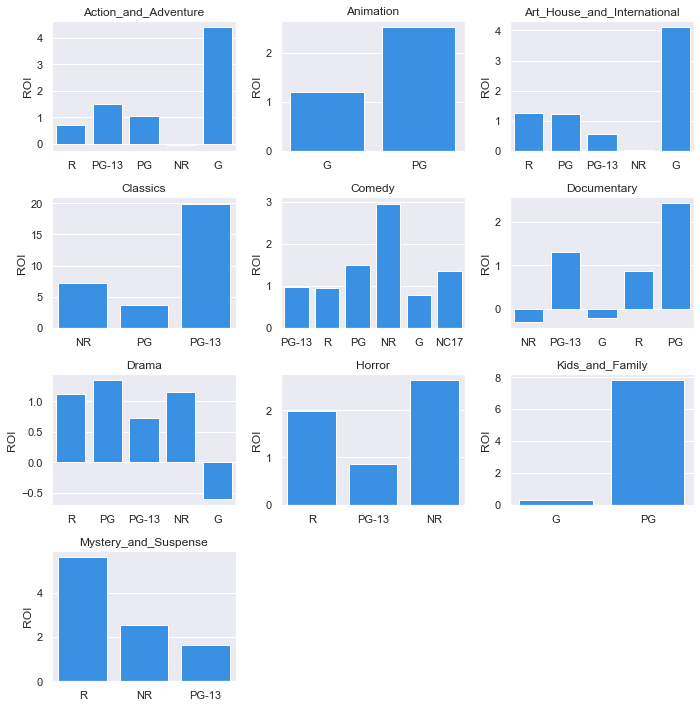

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
st = sns.set_style("ticks")
color = (sns.set_palette("Blues"))
sns.set()
for n in range(1,11):#(1,12) if keeping duplicates
   # sns.set_style('ticks')
    row=(n-1) // 3
    col=n%3-1
    ax= axes[row][col]
    x= list(cats[n-1].keys())
    y= list(cats[n-1].values())
    
   
    ax.set_title(cats_string[n-1])
    ax.set_ylabel('ROI')
    fig.tight_layout()
  
    sns.barplot(x=x, y= y, ax=ax, color = 'dodgerblue');
for n in range(10,12):
    row=(n-1) // 3
    col=n%3-3
    ax= axes[row][col]
    fig.delaxes(ax) 

In [37]:
cats

[{'R': 0.7050963814285715,
  'PG-13': 1.5078585714285713,
  'PG': 1.0351687666666667,
  'NR': -0.04635638666666664,
  'G': 4.423664642857143},
 {'G': 1.206302742857143, 'PG': 2.528756246575343},
 {'R': 1.2546892680555555,
  'PG': 1.2355243285714286,
  'PG-13': 0.5757244399999999,
  'NR': 0.021907076923076918,
  'G': 4.11707625},
 {'NR': 7.199999999999999, 'PG': 3.65, 'PG-13': 19.934156993939393},
 {'PG-13': 0.9586446675830469,
  'R': 0.9346128076923077,
  'PG': 1.4992411787179487,
  'NR': 2.953285464705882,
  'G': 0.7884234027777777,
  'NC17': 1.34423784},
 {'NR': -0.30530517241379307,
  'PG-13': 1.3161530645658264,
  'G': -0.206658925,
  'R': 0.8777983428571428,
  'PG': 2.4271353782608696},
 {'R': 1.1152443623188404,
  'PG': 1.3497891818181817,
  'PG-13': 0.728771107,
  'NR': 1.1631731894736843,
  'G': -0.6},
 {'R': 1.9790991438697318,
  'PG-13': 0.866469153846154,
  'NR': 2.634594054054054},
 {'G': 0.2690149944078948, 'PG': 7.792251350000001},
 {'R': 5.591485222222222,
  'NR': 2.5419